In [14]:
from IPython.display import Image

### basics

- Manifold learning is an approach to **non-linear dimensionality reduction**.
    - Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high.
- High-dimensional datasets can be very difficult to visualize.
    - The simplest way to accomplish this dimensionality reduction is by taking a random projection of the data.
    - To address this concern, a number of **supervised and unsupervised linear dimensionality reduction** frameworks have been designed, such as Principal Component Analysis (PCA), Independent Component Analysis, Linear Discriminant Analysis, and others.
        - These algorithms define specific rubrics to choose an “interesting” linear projection of the data.
        - These methods can be powerful, but often miss important non-linear structure in the data.
    - Manifold Learning can be thought of as an attempt to generalize linear frameworks like PCA to be sensitive to non-linear structure in data. 

- 有数据集 $\{x_i\}_{i=1}^N\in R^D$，我们假设这些数据点近似地位于一个嵌入在 $R^D$ 中的 $d-$维光滑流形 $\mathcal M$ 上（$d\ll D$），流形学习的目标是寻找一个映射函数

$$
f:R^D\rightarrow R^d
$$

- 使得当 $\{x_i\}$ 映射为 $\{y_i\}$ 时，所得到的 $\{y_i\}$ 在低维空间中最大程度地保留原始数据点在流形上的局部或全局结构特征；

In [15]:
Image(url='./imgs/LLE.png', width=400)

- 在流形学习（manifold learning）中，构建临接（邻接）关系的目标是将数据点 $\{x_i\}$ 表示为一个加权图 $G=(V,E)$。
    - 构建邻接关系通常需要定义准则以确定哪些点应被视为“相邻”，从而决定图结构的稀疏性与局部几何信息的精度。
    - knn
    - ϵ-Neighborhood Graph
    - 无论是 k-近邻还是ϵ-邻域，都需给定距离度量 $d(\cdot,\cdot)$，通常为欧氏距离）或相似度度量。若采用核函数（如高斯核）来定义边权重
        - $w_{i,j}=\exp\left(\frac{\|x_i-x_j\|^2}{t^2}\right)$

### sklearn.manifold

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap, LocallyLinearEmbedding, SpectralEmbedding, TSNE
from sklearn.datasets import make_swiss_roll

In [2]:
# 生成 Swiss roll 数据
X, color = make_swiss_roll(n_samples=1000, noise=0.05, random_state=42)

In [3]:
X.shape

(1000, 3)

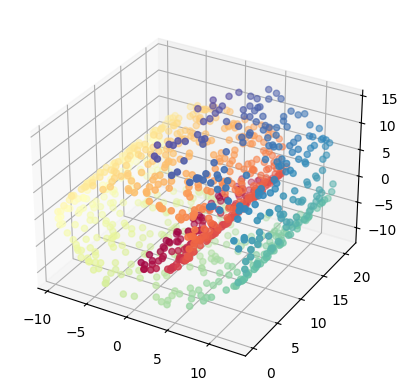

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制 3D 散点图
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

#### PCA

In [8]:
# 可视化函数
def plot_embedding(X, title):
    plt.scatter(X[:,0], X[:,1], c=color, cmap=plt.cm.Spectral)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

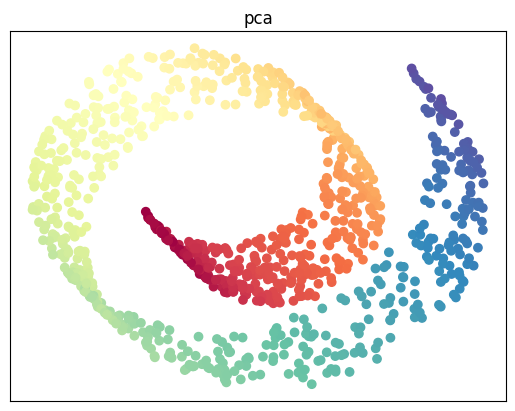

In [13]:
plot_embedding(X_pca, 'pca')

In [6]:
isomap = Isomap(n_neighbors=10, n_components=2)
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard')
laplacian_eig = SpectralEmbedding(n_neighbors=10, n_components=2)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

In [7]:
# 拟合并转换数据
X_isomap = isomap.fit_transform(X)
X_lle = lle.fit_transform(X)
X_le = laplacian_eig.fit_transform(X)
X_tsne = tsne.fit_transform(X)

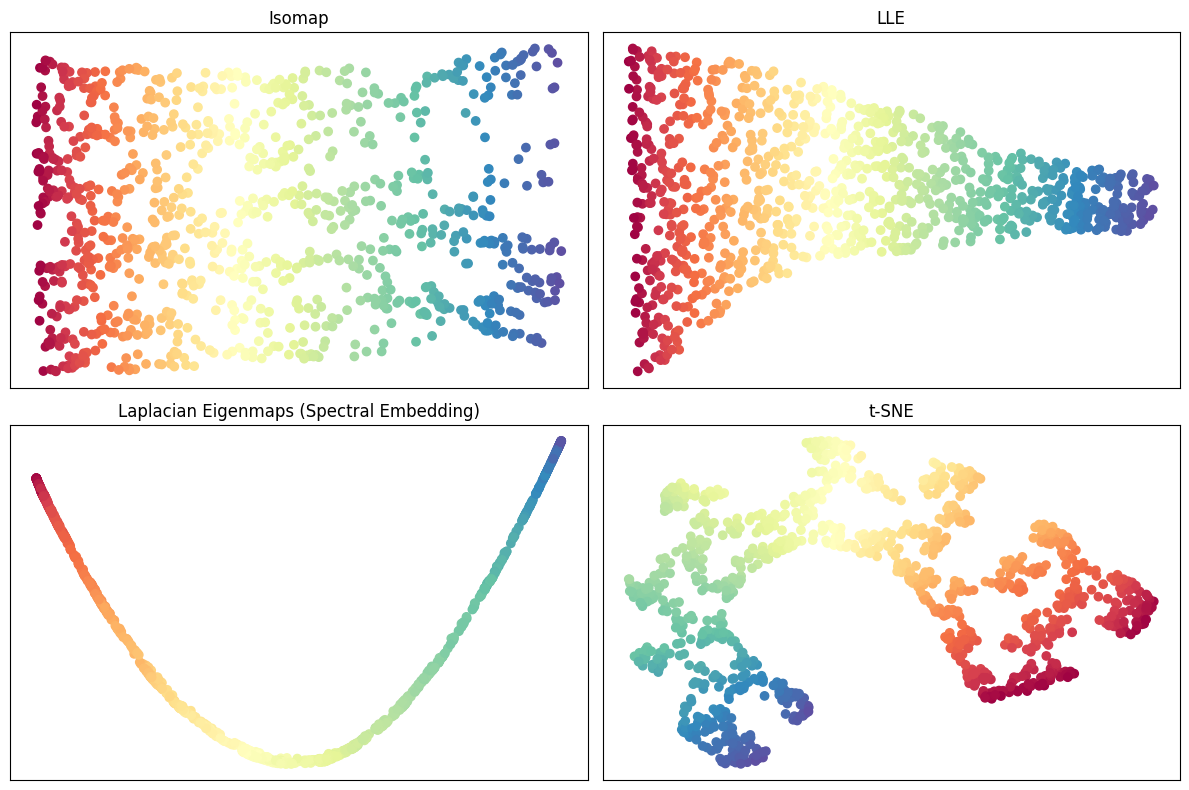

In [9]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plot_embedding(X_isomap, "Isomap")

plt.subplot(2,2,2)
plot_embedding(X_lle, "LLE")

plt.subplot(2,2,3)
plot_embedding(X_le, "Laplacian Eigenmaps (Spectral Embedding)")

plt.subplot(2,2,4)
plot_embedding(X_tsne, "t-SNE")

plt.tight_layout()